In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import stats, spatial

In [4]:
data_path = '../../data/temporal_lda/'

In [5]:
fandom_list_futu = [i for i in os.listdir(data_path) if 'futu' in i]

In [6]:
fandom_list_prev = [i for i in os.listdir(data_path) if 'prev' in i]

In [7]:
df2 = pd.read_csv(os.path.join(data_path, fandom_list_futu[0]), sep = '\t')


In [8]:
df2.Cos.tolist()

[0.3053930421569757,
 0.06479674863129725,
 0.01801337134583092,
 0.015272571434333469,
 0.10466904377120677,
 0.21411602266958507,
 0.9555462222764386,
 0.008728969473945969,
 0.007743991716932741,
 0.5999315492537787,
 0.0445889888547667,
 0.6188878707798604,
 0.032991878037819215,
 0.033659711337332136,
 0.7312629092895098,
 0.06676742364143906,
 0.01588053792813826,
 0.011107435450543046,
 0.43617225763886797,
 0.6742810611250676,
 0.020608828225596176,
 0.016065269550735284,
 0.8347672492543305,
 0.012633132627376087,
 0.20862109511796176,
 0.8454191980126077,
 0.021365988133529967,
 0.036723031752039725,
 0.026979989866411702,
 0.9025346140764412,
 0.020812207032624645,
 0.0506867669198906,
 0.5444200192307821,
 0.5164636200911374,
 0.8936489607318336,
 0.7657779069703847,
 0.02001607599373956,
 0.1160571758396105,
 0.7833071134981129,
 0.02169955001491031,
 0.2595518399042607,
 0.02194752487061014,
 0.3981456689589836,
 0.03209258141284788,
 0.7971482195004607,
 0.26269039729684

In [9]:
for i,fandom in enumerate(fandom_list_futu):
#     df = pd.read_csv(os.path.join(data_path, fandom_list_futu[i]), sep = '\t')

    df2 = pd.read_csv(os.path.join(data_path, fandom_list_futu[i]), sep = '\t')
#     df2 = pd.read_csv(os.path.join(data_path, fandom_list_prev[i]), sep = '\t')

#     df = pd.merge(df1, df2, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
#        'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
#        'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
#        'PublishDate', 'Rating', 'Relationship', 'Summary', 'Title', 'URL',
#        'UpdateDate', 'Words'], how='inner')
    
#     print(fandom, len(df))
#     df['KL'] = abs(df['KL_x'] - df['KL_y'])
    df2 = df2.dropna(subset=['Cos', 'Words'])
    x = df2['Cos']
    y = df2['Words']
    print(stats.pearsonr(x,y))
    

(-0.057573022709064496, 0.0019245295798202037)
(-0.056635426765642372, 0.073427159253523333)
(-0.072084933104474641, 0.0029411656690406739)
(-0.1420787074475871, 5.5292294748963089e-28)
(-0.010807988371246946, 0.41459732003850236)
(0.0089593770515865017, 0.58086444729251574)
(-0.087427368711186837, 1.7945347656538522e-05)
(-0.046418650665598006, 0.21997732984342266)
(-0.14279909229439319, 0.156391642713579)
(-0.094682727889726634, 1.249565984715682e-12)
(-0.1161183593197806, 1.1637137937133692e-08)
(-0.025355849279721811, 0.23451445836294021)
(-0.088645460957888444, 0.00089893354345021265)
(0.15360076510732501, 7.6319808399250541e-09)
(-0.070151645335511312, 0.00015631803083952623)
(-0.046109645663340908, 0.03056770909641484)
(-0.053062506491028283, 0.0016876842601088579)
(-0.06903612074862088, 0.01278476962544335)
(0.078215207194881217, 0.0047769825868144294)
(0.00745345686889653, 0.70952683690267893)
(-0.072499590138369402, 0.00028569010711202239)
(-0.05732827439781335, 0.00098870448

In [10]:
def bootstrap_resample(li):
    ave_original = np.average(li)
    aves = []
    for i in range(1000):
        sample = []
        for i in range(len(li)):
            sample.append(random.choice(li))
        aves.append(np.average(sample))
    tail = sorted(aves)[24]
    head = sorted(aves)[975]
    return (ave_original, tail, head)

In [11]:
def create_normed_dfs(df):
    
    # Normalize effects of authors by turning kudos into z-score corresponding to works from this author
    # Seems not useful b/c many authors only have 1 work
#     author_list = df.Author.drop_duplicates().tolist()
#     combined = []
#     for author in author_list:
#         df_a = df[df.Author == author]
#         if len(df_a) > 1:
#             df_a['Kudos'] = (df_a['Kudos'] - df_a['Kudos'].mean())/df_a['Kudos'].std(ddof=0)
#             combined.append(df_a)        
#     df = pd.concat(combined)
#     df = df[df.Kudos != 0]

# #     Normalize by creating hits/kudos 
#     df = df[df.Hits != 0]
#     df = df[df.Kudos != 0]
#     df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    
#     Normalize by log scale
    df = df[df.Kudos != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df = df[df.Hits != 0]
    df['Hits'] = np.log(df['Hits'])
    df['Kudos/Hits'] = df['Kudos'] - df['Hits']

#     # filter 0s
# #     df = df.fillna(0)"

#     # turn into z scores
#     df['Cos'] = df['Cos'].astype(float)
#     df['Cos'] = (df['Cos'] - df['Cos'].mean())/df['Cos'].std(ddof=0)

    return df

### Plot with bins

In [12]:
def create_dict(fandom, field, binsize):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df = df.dropna(subset = [field])
    df = create_normed_dfs(df)
    # Make bins
    df.Cos = df.Cos.astype(float)
    min_cos = min(df.Cos.tolist()) - 0.1
    max_cos = max(df.Cos.tolist()) + 0.1
    dic = {}
    for i in np.arange(min_cos, max_cos, binsize):
        df_s = df[(df.Cos >= i) & (df.Cos < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        li = df_s[field].tolist()
        if len(li) > 0:
            dic[i] = bootstrap_resample(li)
    return dic

In [13]:
def create_dict_2(fandom, field, binsize):
    
    df1 = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df2 = pd.read_csv(os.path.join(data_path,fandom.replace("prev","futu")), sep = '\t', error_bad_lines=False)
    df = pd.merge(df1, df2, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Relationship', 'Summary', 'Title', 'URL',
       'UpdateDate', 'Words'], how='inner')
    
    df['Cos'] = df['Cos_y'] - df['Cos_x']
    df = df.dropna(subset = ['Cos'])
    df = df.dropna(subset = ['Kudos'])
    df = create_normed_dfs(df)
    
    # Make bins
    df.Cos = df.Cos.astype(float)
    min_cos = min(df.Cos.tolist()) - 0.1
    max_cos = max(df.Cos.tolist()) + 0.1
    dic = {}
    for i in np.arange(min_cos, max_cos, binsize):
        df_s = df[(df.Cos >= i) & (df.Cos < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        dic[i] = bootstrap_resample(df_s[field].tolist())
    return dic

In [14]:
def plot_scatter(fandom_list):
    fig, axs = plt.subplots(5,5, figsize=(30, 20))
    axs = axs.ravel()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.rcParams.update({'axes.titlesize': 'large'})
    
    for i,fandom in enumerate(fandom_list):
        dic = create_dict(fandom, 'Kudos', 0.2)
        x = sorted(dic.keys())
        y = [dic[j][0] for j in x]
        
#     Make error bars
        lower_error = [dic[j][0]-dic[j][1] for j in x]
        upper_error = [dic[j][2]-dic[j][0] for j in x]
        asymmetric_error = [lower_error, upper_error]
        

        axs[i].errorbar(x, y, yerr=asymmetric_error,fmt='o')
        axs[i].plot(x, y, 'o-')
#         title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
#         .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
#         axs[i].set_title(title, fontsize = 20)
#         axs[i].set_xlim([min(x) -1, max(x) + 1])
#         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
        for tick in axs[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
        for tick in axs[i].yaxis.get_major_ticks():
            tick.label.set_fontsize(16)

#         break
        # ax.set_yscale('log')

        fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
        fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#         except:
#             pass
#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')



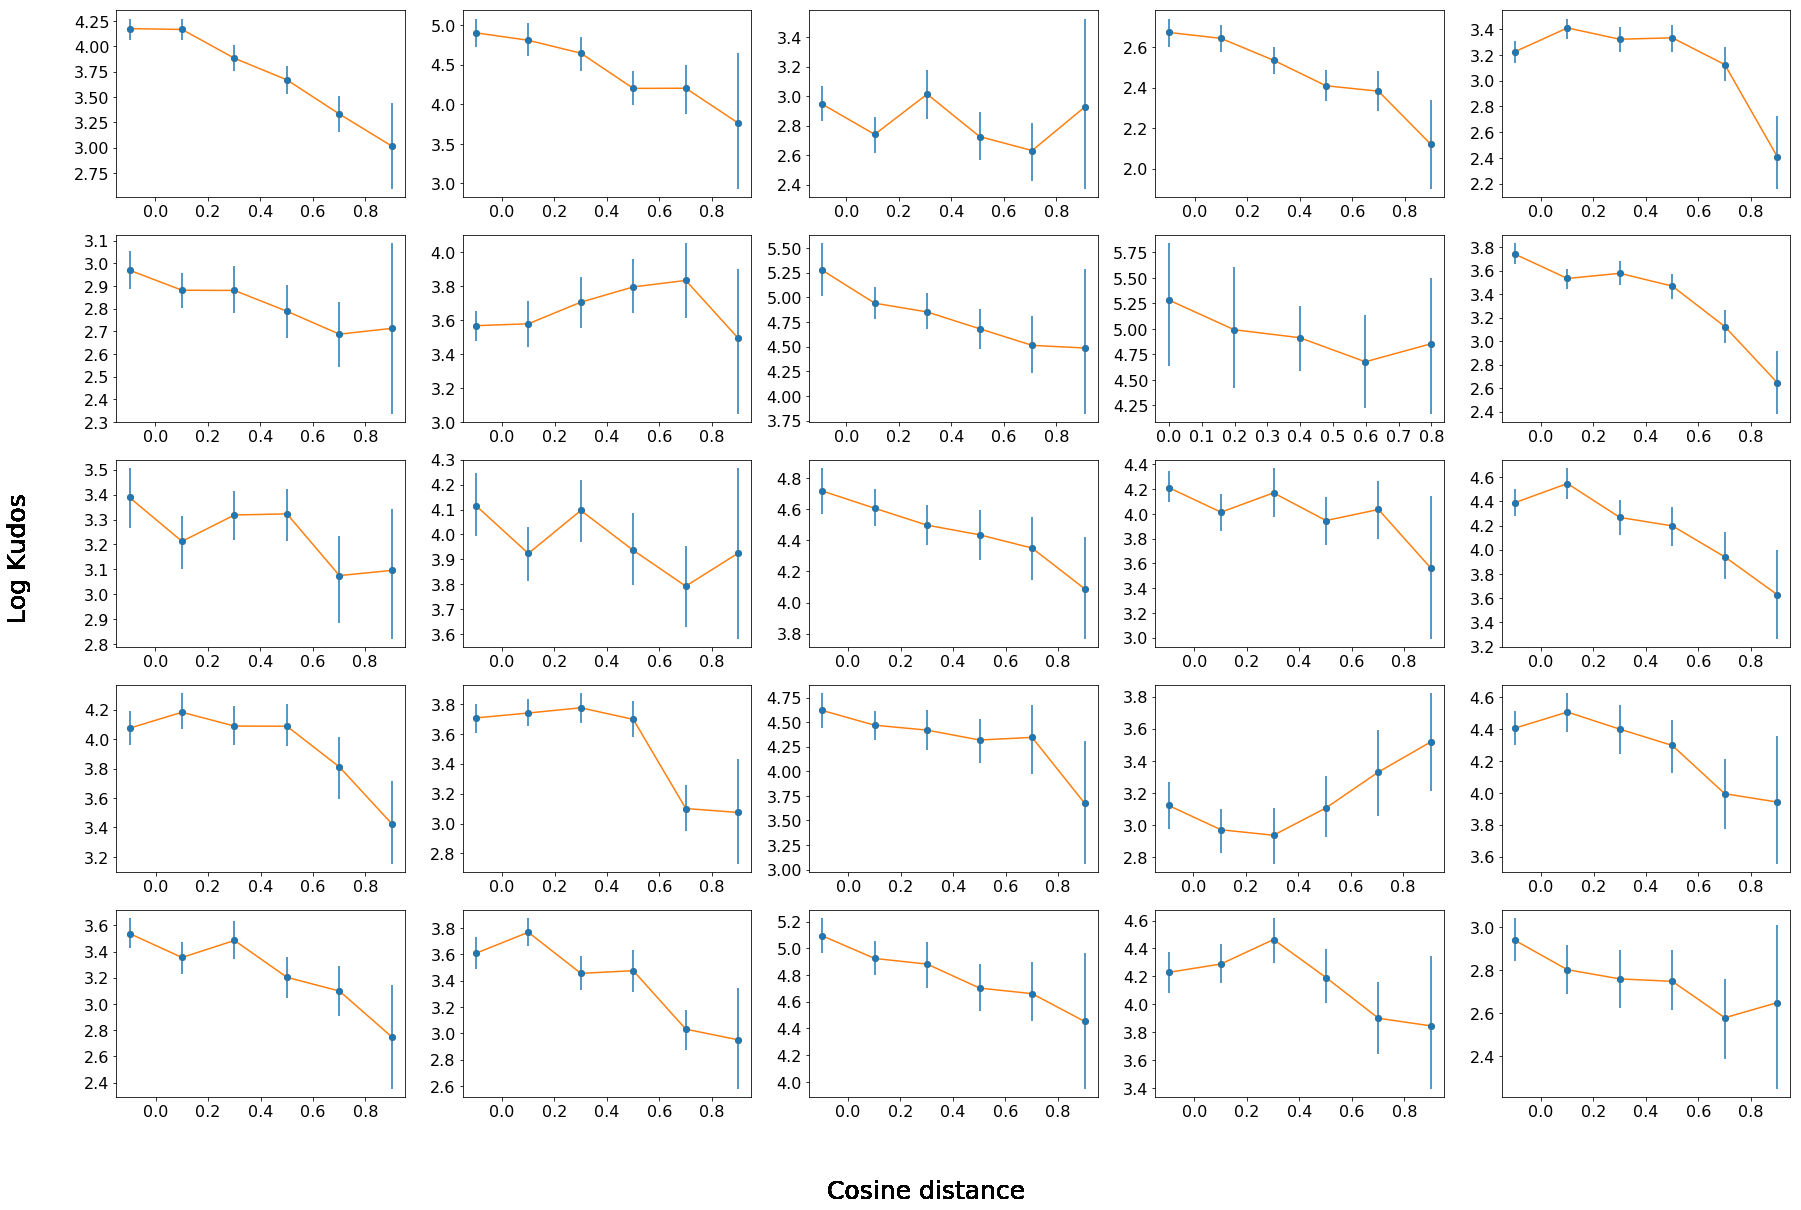

In [37]:
plot_scatter(fandom_list_prev)

In [39]:
def plot_scatter(fandom_list):
    fig, axs = plt.subplots(5,5, figsize=(30, 20))
    axs = axs.ravel()
    
    for i,fandom in enumerate(fandom_list):
#         try:
        df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)

        x = df['Cos']
        y = np.log(df['Kudos'])

        axs[i].hexbin(x, y,gridsize=15)

        fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
        fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#         except:
#             pass
#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')



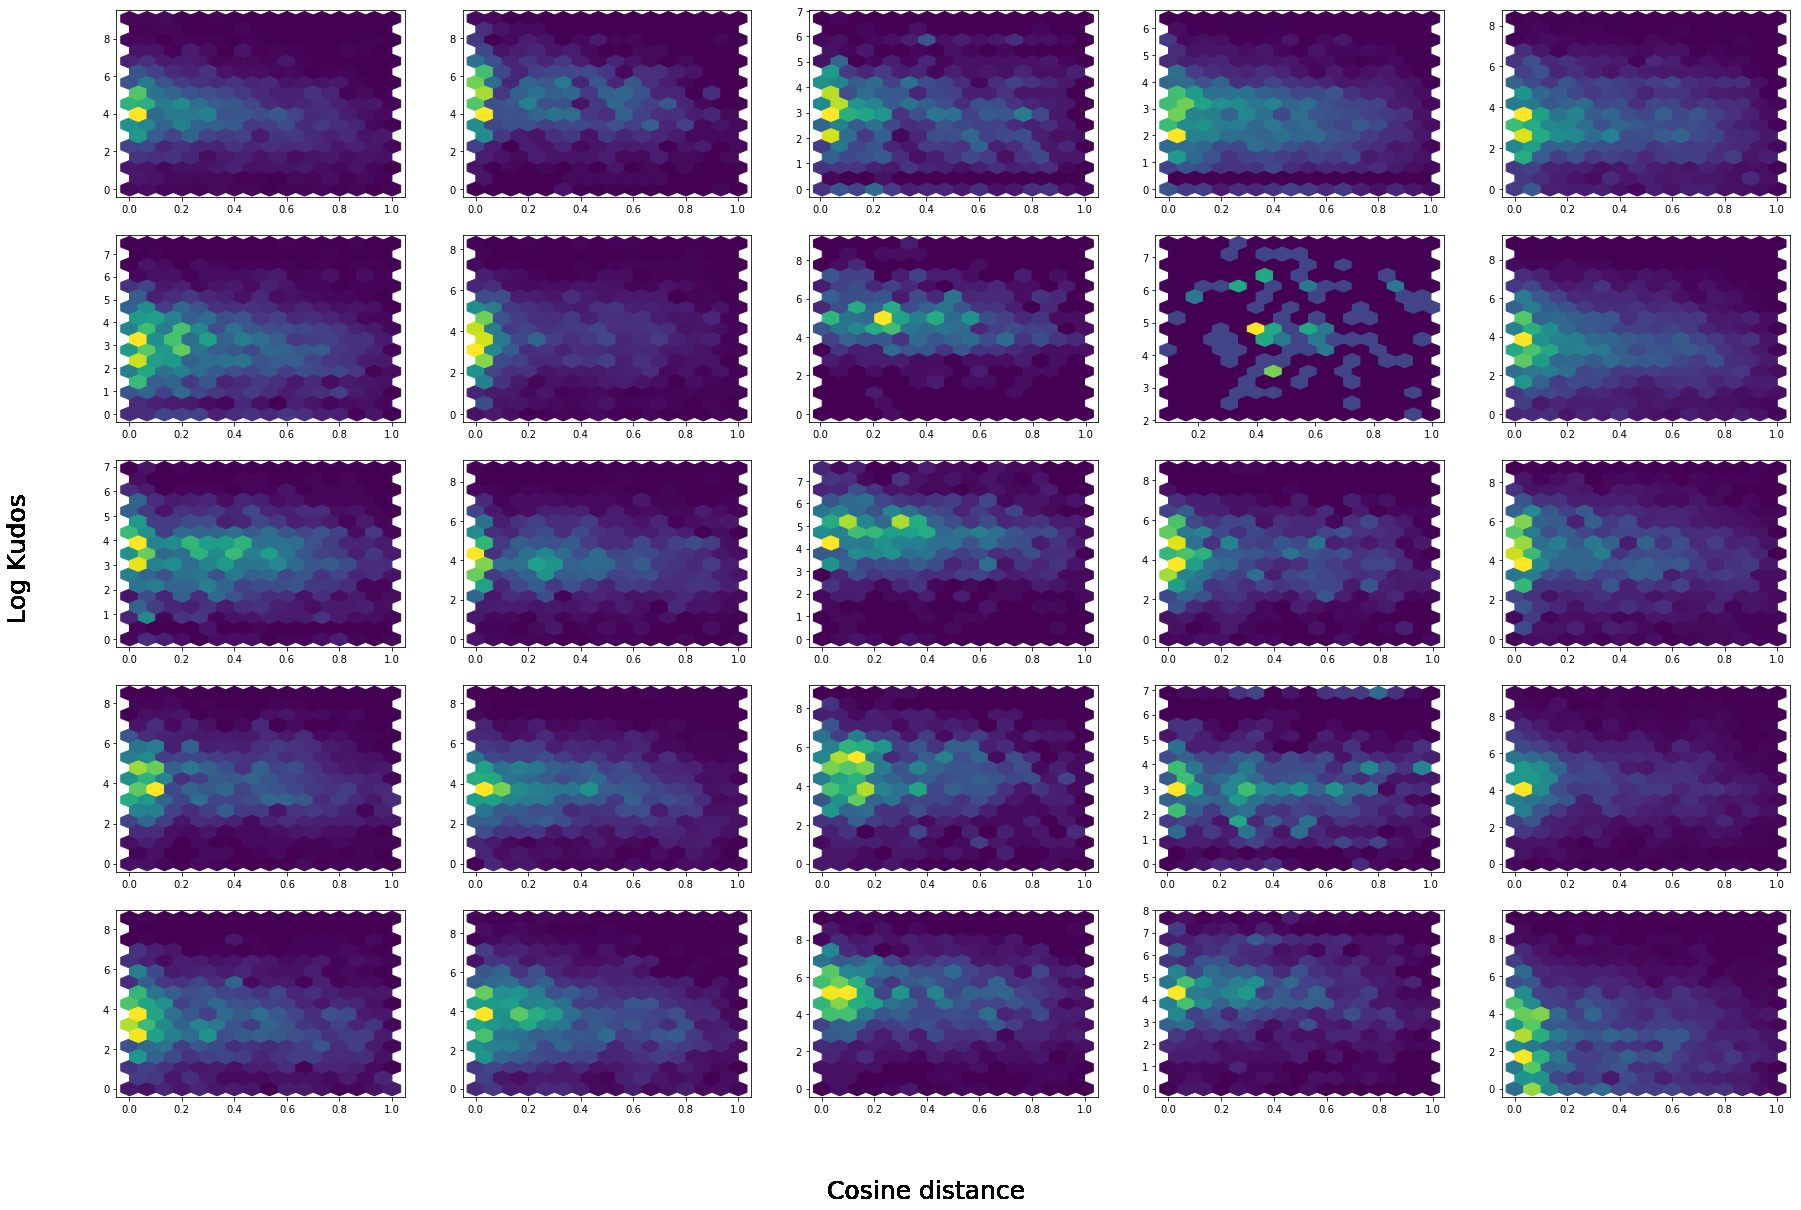

In [40]:
plot_scatter(fandom_list_prev)

## Aggregate

In [15]:
def create_normed_dfs(df):
    
    # Normalize effects of authors by turning kudos into z-score corresponding to works from this author
    # Seems not useful b/c many authors only have 1 work
#     author_list = df.Author.drop_duplicates().tolist()
#     combined = []
#     for author in author_list:
#         df_a = df[df.Author == author]
#         if len(df_a) > 1:
#             df_a['Kudos'] = (df_a['Kudos'] - df_a['Kudos'].mean())/df_a['Kudos'].std(ddof=0)
#             combined.append(df_a)        
#     df = pd.concat(combined)
#     df = df[df.Kudos != 0]

# #     Normalize by creating hits/kudos 
#     df = df[df.Hits != 0]
#     df = df[df.Kudos != 0]
#     df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    
#     Normalize by log scale
#     df = df[df.Kudos != 0]
#     df['Kudos'] = np.log(df['Kudos'])
#     df = df[df.Hits != 0]
#     df['Hits'] = np.log(df['Hits'])
#     df['Kudos/Hits'] = df['Kudos'] - df['Hits']

#     # filter 0s
# #     df = df.fillna(0)"

#     # turn into z scores
    df['Kudos'] = df['Kudos'].astype(float)
    df['Kudos'] = (df['Kudos'] - df['Kudos'].mean())/df['Kudos'].std(ddof=0)

    return df

In [20]:
def create_dict(df, field, binsize):
    
    # Make bins
    df.Cos = df.Cos.astype(float)
    min_cos = min(df.Cos.tolist()) 
    max_cos = max(df.Cos.tolist()) 
    dic = {}
    for i in np.arange(min_cos, max_cos, binsize):
        df_s = df[(df.Cos >= i) & (df.Cos < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        li = df_s[field].tolist()
        if len(li) > 0:
            dic[i] = bootstrap_resample(li)
    return dic

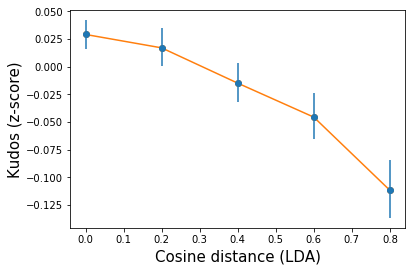

In [22]:
df_all = []
for i,fandom in enumerate(fandom_list_prev):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df = df[['Cos', 'Kudos']].dropna()
    df_all.append(create_normed_dfs(df))
df = pd.concat(df_all)

# print(sorted(df.Cos))[0:10]
dic = create_dict(df, 'Kudos', 0.2)
x = sorted(dic.keys())
y = [dic[j][0] for j in x]

#     Make error bars
lower_error = [dic[j][0]-dic[j][1] for j in x]
upper_error = [dic[j][2]-dic[j][0] for j in x]
asymmetric_error = [lower_error, upper_error]


plt.errorbar(x, y, yerr=asymmetric_error,fmt='o')
plt.plot(x, y, 'o-')
plt.xlabel('Cosine distance (LDA)',fontsize=15)
plt.ylabel('Kudos (z-score)',fontsize=15)
# #         title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
# #         .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
# #         axs[i].set_title(title, fontsize = 20)
# #         axs[i].set_xlim([min(x) -1, max(x) + 1])
# #         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
#     for tick in axs[i].xaxis.get_major_ticks():
#         tick.label.set_fontsize(16) 
#     for tick in axs[i].yaxis.get_major_ticks():
#         tick.label.set_fontsize(16)

# #         break
#     # ax.set_yscale('log')

#     fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
#     fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

# #         except:
# #             pass
plt.savefig('lda_cos_kudos_z_toprev.pdf', format = 'pdf')

